# 2019/02/13    - test campaign 2, day 3
##    4.5 Measure M1 and M3 before and after applying horizon pointing forces (25% only, repeat x2)
##    4.6 Measure M1 and M3 LSST bending modes (labeled 3.7; M1 BM 1-5,19,23,6-16; same for M3)

In [1]:
from M1M3tools import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import glob
import pandas as pd

%matplotlib inline
plt.jet()

dateID = 190213

<Figure size 432x288 with 0 Axes>

### We apply 1/4 of the horizon forces derived by Bo.
This is essentially just a special bending mode. The measuremens were performed the same way as we do the bending modes.
### M1 first, 2 iterations, each containing +--+ measurements

4-5 bending mode 1 ------ irow = 0, icol = 0, -----------------------------
/Processed/190213_4-5/190213 4-5 M1 horiz+1-1 burst50 morph -.h5: Wed Feb 13 09:46:57 2019 
4-5 bending mode 1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190213_4-5/190213 4-5 M1 horiz-1-1 burst50 morph -.h5: Wed Feb 13 09:51:14 2019 
4-5 bending mode 1 ------ irow = 0, icol = 2, -----------------------------
/Processed/190213_4-5/190213 4-5 M1 horiz-1-2 burst50 morph -.h5: Wed Feb 13 09:54:16 2019 
4-5 bending mode 1 ------ irow = 0, icol = 3, -----------------------------
/Processed/190213_4-5/190213 4-5 M1 horiz+1-2 burst50 morph -.h5: Wed Feb 13 09:58:04 2019 
4-5 bending mode 2 ------ irow = 1, icol = 0, -----------------------------
/Processed/190213_4-5/190213 4-5 M1 horiz+2-1 burst50 morph -.h5: Wed Feb 13 10:06:10 2019 
4-5 bending mode 2 ------ irow = 1, icol = 1, -----------------------------
/Processed/190213_4-5/190213 4-5 M1 horiz-2-1 burst50 morph -.h5: Wed Feb 13 10:09:5

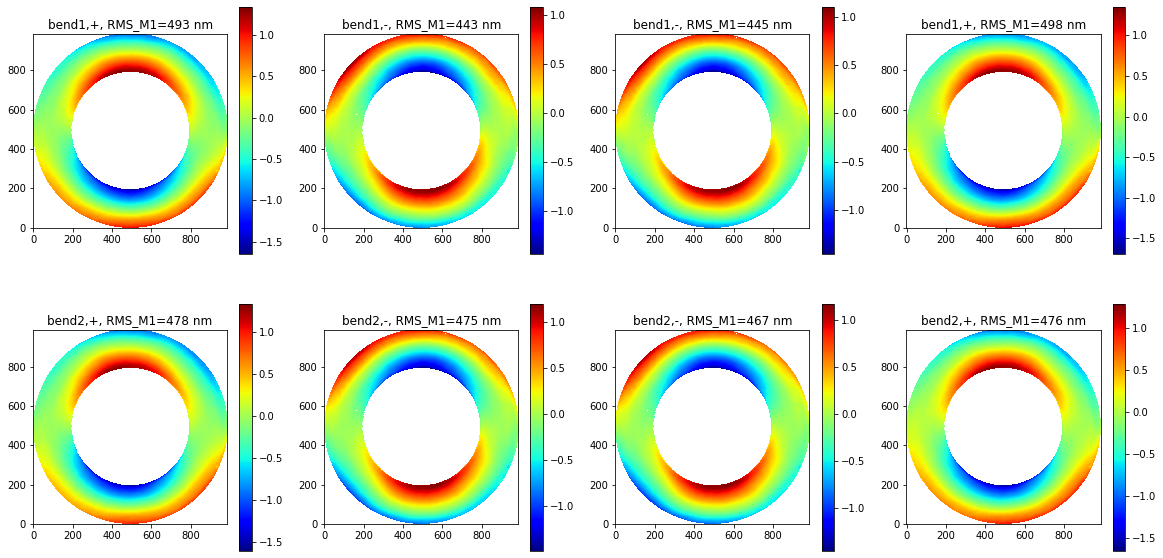

In [2]:
testID = '4-5' 
fig, ax = plt.subplots(2,4,figsize=(20,5*2))
i = 0
for modeID in [1,2]:
    signedBend = ['+%d-1'%modeID, '-%d-1'%modeID, '-%d-2'%modeID, '+%d-2'%modeID]
    for bend in signedBend:
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1
        print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
            testID, modeID, irow, icol))
        pattern = '%s/Processed/%d_%s/%d %s M1 horiz%s*burst*morph -.h5'%(
            dataDir, dateID, testID, dateID, testID, bend)
        fileset = sorted(glob.glob(pattern))
        #print(pattern)
        m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

        m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm

        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('bend%d,%s, RMS_M1=%.0f nm'%(modeID, bend[0], m1rms))

### M3 next, 2 iterations, each containing +--+ measurements

4-5 bending mode 1 ------ irow = 0, icol = 0, -----------------------------
/Processed/190213_4-5/190213 4-5 M3 horiz+1-1 burst20 morph -.h5: Wed Feb 13 10:32:00 2019 
4-5 bending mode 1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190213_4-5/190213 4-5 M3 horiz-1-1 burst20 morph -.h5: Wed Feb 13 10:34:02 2019 
4-5 bending mode 1 ------ irow = 0, icol = 2, -----------------------------
/Processed/190213_4-5/190213 4-5 M3 horiz-1-2 burst20 morph -.h5: Wed Feb 13 10:35:22 2019 
4-5 bending mode 1 ------ irow = 0, icol = 3, -----------------------------
/Processed/190213_4-5/190213 4-5 M3 horiz+1-2 burst20 morph -.h5: Wed Feb 13 10:40:35 2019 
4-5 bending mode 2 ------ irow = 1, icol = 0, -----------------------------
/Processed/190213_4-5/190213 4-5 M3 horiz+2-1 burst20 morph -.h5: Wed Feb 13 10:45:10 2019 
4-5 bending mode 2 ------ irow = 1, icol = 1, -----------------------------
/Processed/190213_4-5/190213 4-5 M3 horiz-2-1 burst20 morph -.h5: Wed Feb 13 10:50:1

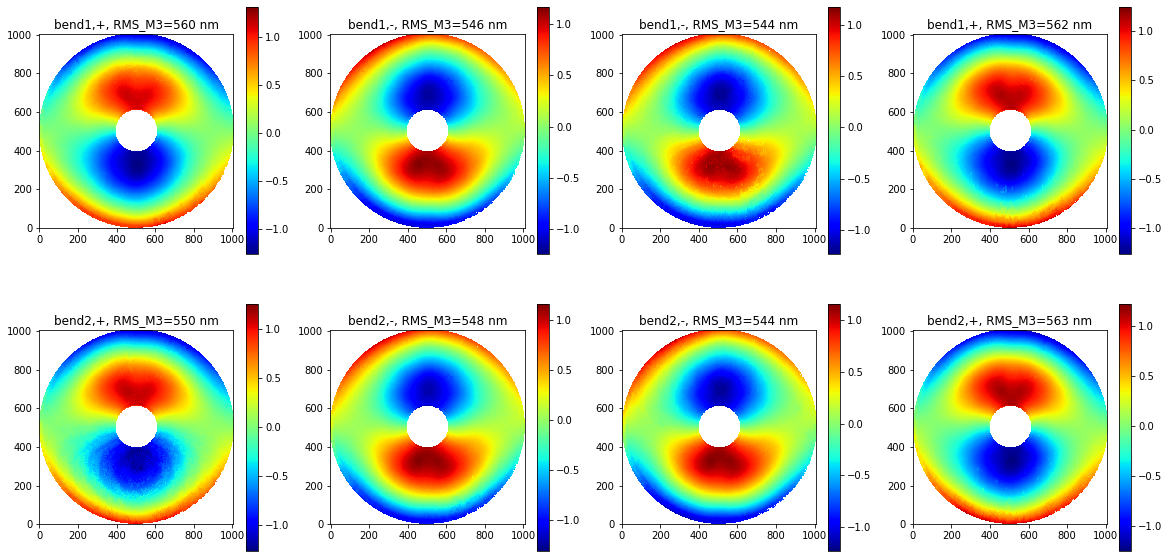

In [3]:
testID = '4-5' 
fig, ax = plt.subplots(2,4,figsize=(20,5*2))
i = 0
for modeID in [1,2]:
    signedBend = ['+%d-1'%modeID, '-%d-1'%modeID, '-%d-2'%modeID, '+%d-2'%modeID]
    for bend in signedBend:
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1
        print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
            testID, modeID, irow, icol))
        pattern = '%s/Processed/%d_%s/%d %s M3 horiz%s*burst*morph -.h5'%(
            dataDir, dateID, testID, dateID, testID, bend)
        fileset = sorted(glob.glob(pattern))
        #print(pattern)
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)

        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm

        img = ax[irow][icol].imshow(m3s, origin='lowerleft')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('bend%d,%s, RMS_M3=%.0f nm'%(modeID, bend[0], m3rms))

### Measured horizon shape

4-5 horizon measurement # 1 ------ irow = 0, icol = 0, -----------------------------
/Processed/190213_4-5/Combined/Combined M1M3 Map Mode number-1.h5: date not in h5 file. 
/Processed/190213_4-5/Combined/Combined M1M3 Map Mode number-1.h5: date not in h5 file. 
4-5 horizon measurement # 2 ------ irow = 0, icol = 1, -----------------------------
/Processed/190213_4-5/Combined/Combined M1M3 Map Mode number-2.h5: date not in h5 file. 
/Processed/190213_4-5/Combined/Combined M1M3 Map Mode number-2.h5: date not in h5 file. 


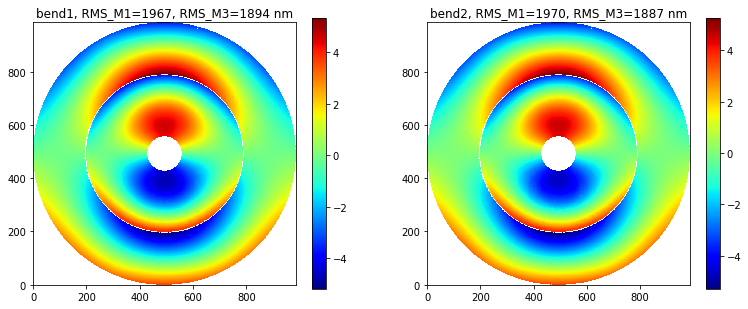

In [4]:
testID = '4-5' 
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for modeID in [1,2]:
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s horizon measurement # %s ------ irow = %d, icol = %d, -----------------------------'%(
        testID, modeID, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s/Combined/Combined*-%d.h5'%(
    dataDir, dateID, testID, modeID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset, '/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset, '/M3Data')

    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm

    img = ax[icol].imshow(s, origin='lowerleft')
    fig.colorbar(img, ax=ax[icol])
    ax[icol].set_title('bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(modeID, m1rms, m3rms))
fig.delaxes(ax.flatten()[-1])     

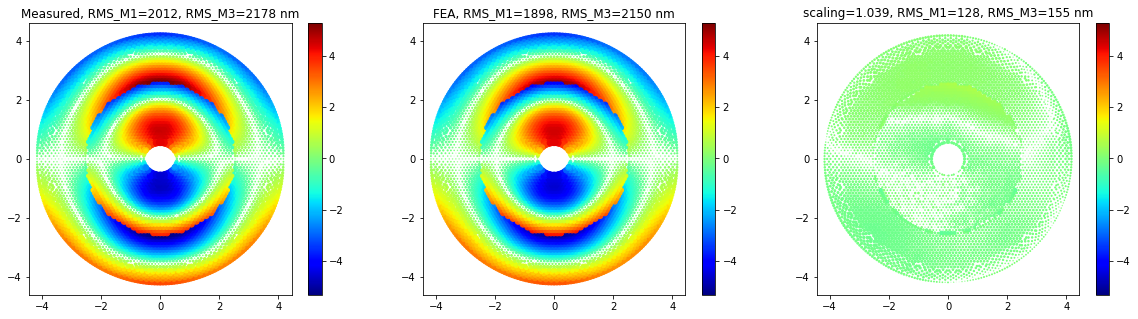

In [5]:
v1=np.max((np.max(m1s[~np.isnan(m1s)]), np.max(m3s[~np.isnan(m3s)]) ))
v2=np.min((np.min(m1s[~np.isnan(m1s)]), np.min(m3s[~np.isnan(m3s)]) ))

df = pd.read_csv('data/horizonResS.csv', header=None)
aa = np.array(df)
x = aa[:,0]
y = aa[:,1]
annulus = aa[:,3]
res = aa[:,2]*1e6; #convert into micron
rms1res = np.std(res[annulus==1])*1000 
rms3res = np.std(res[annulus==3])*1000

df = pd.read_csv('data/horizonMeaS.csv', header=None)
aa = np.array(df)
mea = aa[:,2]*1e6; #convert into micron
rms1mea = np.std(mea[annulus==1])*1000 
rms3mea = np.std(mea[annulus==3])*1000

df = pd.read_csv('data/horizonS.csv', header=None)
aa = np.array(df)
s = aa[:,2]*1e6; #convert into micron
rms1s = np.std(s[annulus==1])*1000 
rms3s = np.std(s[annulus==3])*1000

fig, ax = plt.subplots(1,3,figsize=(20,5*1))
img = ax[0].scatter(x,y,abs(mea*10),mea, vmin=v2, vmax=v1)
ax[0].axis('equal')
ax[0].set_title('Measured, RMS_M1=%.0f, RMS_M3=%.0f nm'%(rms1mea, rms3mea))
fig.colorbar(img, ax=ax[0])
img = ax[1].scatter(x,y,abs(s*10),s, vmin=v2, vmax=v1)
ax[1].axis('equal')
ax[1].set_title('FEA, RMS_M1=%.0f, RMS_M3=%.0f nm'%(rms1s, rms3s))
fig.colorbar(img, ax=ax[1])
img = ax[2].scatter(x,y,abs(res*30),res, vmin=v2, vmax=v1)
ax[2].axis('equal')
ax[2].set_title('scaling=%.3f, RMS_M1=%.0f, RMS_M3=%.0f nm'%(1.0394, rms1res, rms3res))
fig.colorbar(img, ax=ax[2])

### LSST bending mode measurements: 1-16, 19, 23
### M1 first

4-6 bending mode 1 ------ irow = 0, icol = 0, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/190213 3-7 M1 bm+1-1 burst50 morph.h5: Wed Feb 13 11:20:04 2019 
4-6 bending mode 1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/190213 3-7 M1 bm-1-1 burst50 morph.h5: Wed Feb 13 11:23:05 2019 
4-6 bending mode 1 ------ irow = 0, icol = 2, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/190213 3-7 M1 bm-1-2 burst50 morph.h5: Wed Feb 13 11:25:56 2019 
4-6 bending mode 1 ------ irow = 0, icol = 3, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/190213 3-7 M1 bm+1-2 burst50 morph.h5: Wed Feb 13 11:28:57 2019 
4-6 bending mode 2 ------ irow = 1, icol = 0, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/190213 3-7 M1 bm+2-1 burst50 morph.h5: Wed Feb 13 11:31:59 2019 
4-6 bending mode 2 ------ irow = 1, icol = 1, -----------------------------
/Processed/190213_4-6 (L

4-6 bending mode 13 ------ irow = 12, icol = 0, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/190213 3-7 M1 bm+13-1 burst50 morph.h5: Wed Feb 13 14:13:37 2019 
4-6 bending mode 13 ------ irow = 12, icol = 1, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/190213 3-7 M1 bm-13-1 burst50 morph.h5: Wed Feb 13 14:16:43 2019 
4-6 bending mode 13 ------ irow = 12, icol = 2, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/190213 3-7 M1 bm-13-2 burst50 morph.h5: Wed Feb 13 14:19:38 2019 
4-6 bending mode 13 ------ irow = 12, icol = 3, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/190213 3-7 M1 bm+13-2 burst50 morph.h5: Wed Feb 13 14:22:44 2019 
4-6 bending mode 14 ------ irow = 13, icol = 0, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/190213 3-7 M1 bm+14-1 burst50 morph.h5: Wed Feb 13 14:34:47 2019 
4-6 bending mode 14 ------ irow = 13, icol = 1, -----------------------------
/Proces

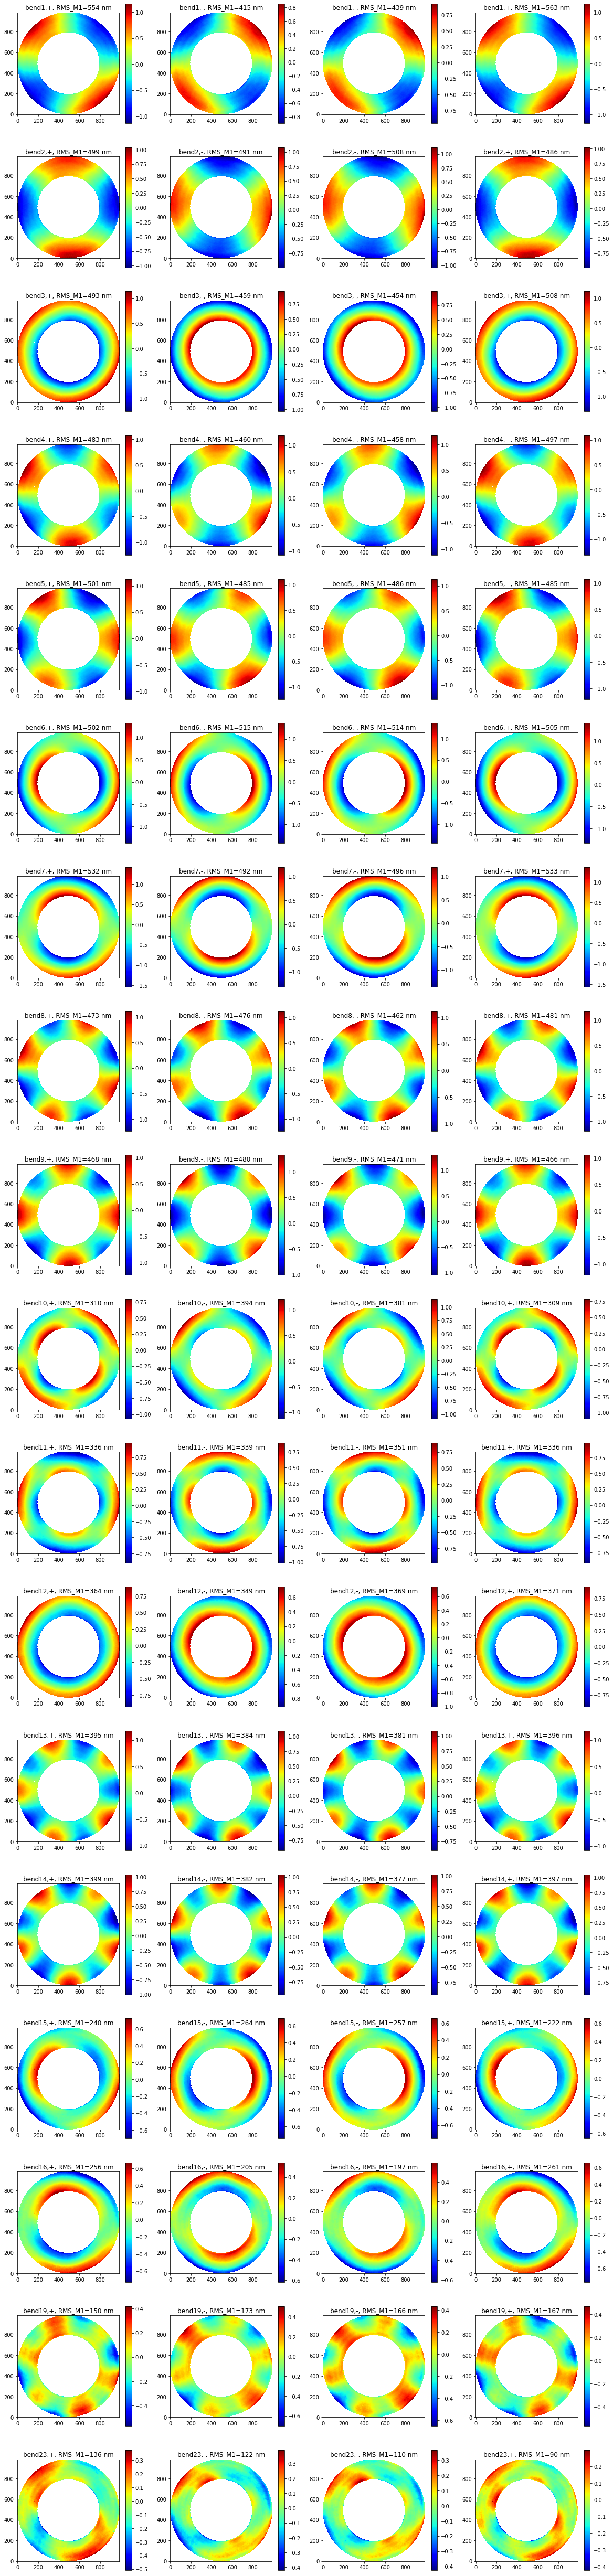

In [6]:
testID = '4-6'
testID1 = '3-7'
iter = ' (Labeled as 3-7)'
fig, ax = plt.subplots(18,4,figsize=(20,5*18))
i = 0
for modeID in np.hstack((np.arange(1,17), 19, 23)):
    signedBend = ['+%d-1'%modeID, '-%d-1'%modeID, '-%d-2'%modeID, '+%d-2'%modeID]
    for bend in signedBend:
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1
        print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
            testID, modeID, irow, icol))
        fileset = sorted(glob.glob('%s/Processed/%d_%s%s/%d %s M1 bm%s*burst*morph.h5'%(
            dataDir, dateID, testID, iter, dateID, testID1, bend)))
        m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

        m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm

        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('bend%d,%s, RMS_M1=%.0f nm'%(modeID, bend[0], m1rms))

### Then M3

4-6 bending mode 1 ------ irow = 0, icol = 0, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/190213 3-7 M3 bm+1-1 burst20 morph -.h5: Wed Feb 13 15:16:01 2019 
4-6 bending mode 1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/190213 3-7 M3 bm-1-1 burst20 morph -.h5: Wed Feb 13 15:17:06 2019 
4-6 bending mode 1 ------ irow = 0, icol = 2, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/190213 3-7 M3 bm-1-2 burst20 morph -.h5: Wed Feb 13 15:17:59 2019 
4-6 bending mode 1 ------ irow = 0, icol = 3, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/190213 3-7 M3 bm+1-2 burst20 morph -.h5: Wed Feb 13 15:19:03 2019 
4-6 bending mode 2 ------ irow = 1, icol = 0, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/190213 3-7 M3 bm+2-1 burst20 morph -.h5: Wed Feb 13 15:20:07 2019 
4-6 bending mode 2 ------ irow = 1, icol = 1, -----------------------------
/Processed/190

4-6 bending mode 13 ------ irow = 12, icol = 1, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/190213 3-7 M3 bm-13-1 burst20 morph -.h5: Wed Feb 13 16:32:56 2019 
4-6 bending mode 13 ------ irow = 12, icol = 2, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/190213 3-7 M3 bm-13-2 burst20 morph -.h5: Wed Feb 13 16:33:49 2019 
4-6 bending mode 13 ------ irow = 12, icol = 3, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/190213 3-7 M3 bm+13-2 burst20 morph -.h5: Wed Feb 13 16:34:53 2019 
4-6 bending mode 14 ------ irow = 13, icol = 0, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/190213 3-7 M3 bm+14-1 burst20 morph -.h5: Wed Feb 13 16:36:41 2019 
4-6 bending mode 14 ------ irow = 13, icol = 1, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/190213 3-7 M3 bm-14-1 burst20 morph -.h5: Wed Feb 13 16:37:45 2019 
4-6 bending mode 14 ------ irow = 13, icol = 2, ---------------------------

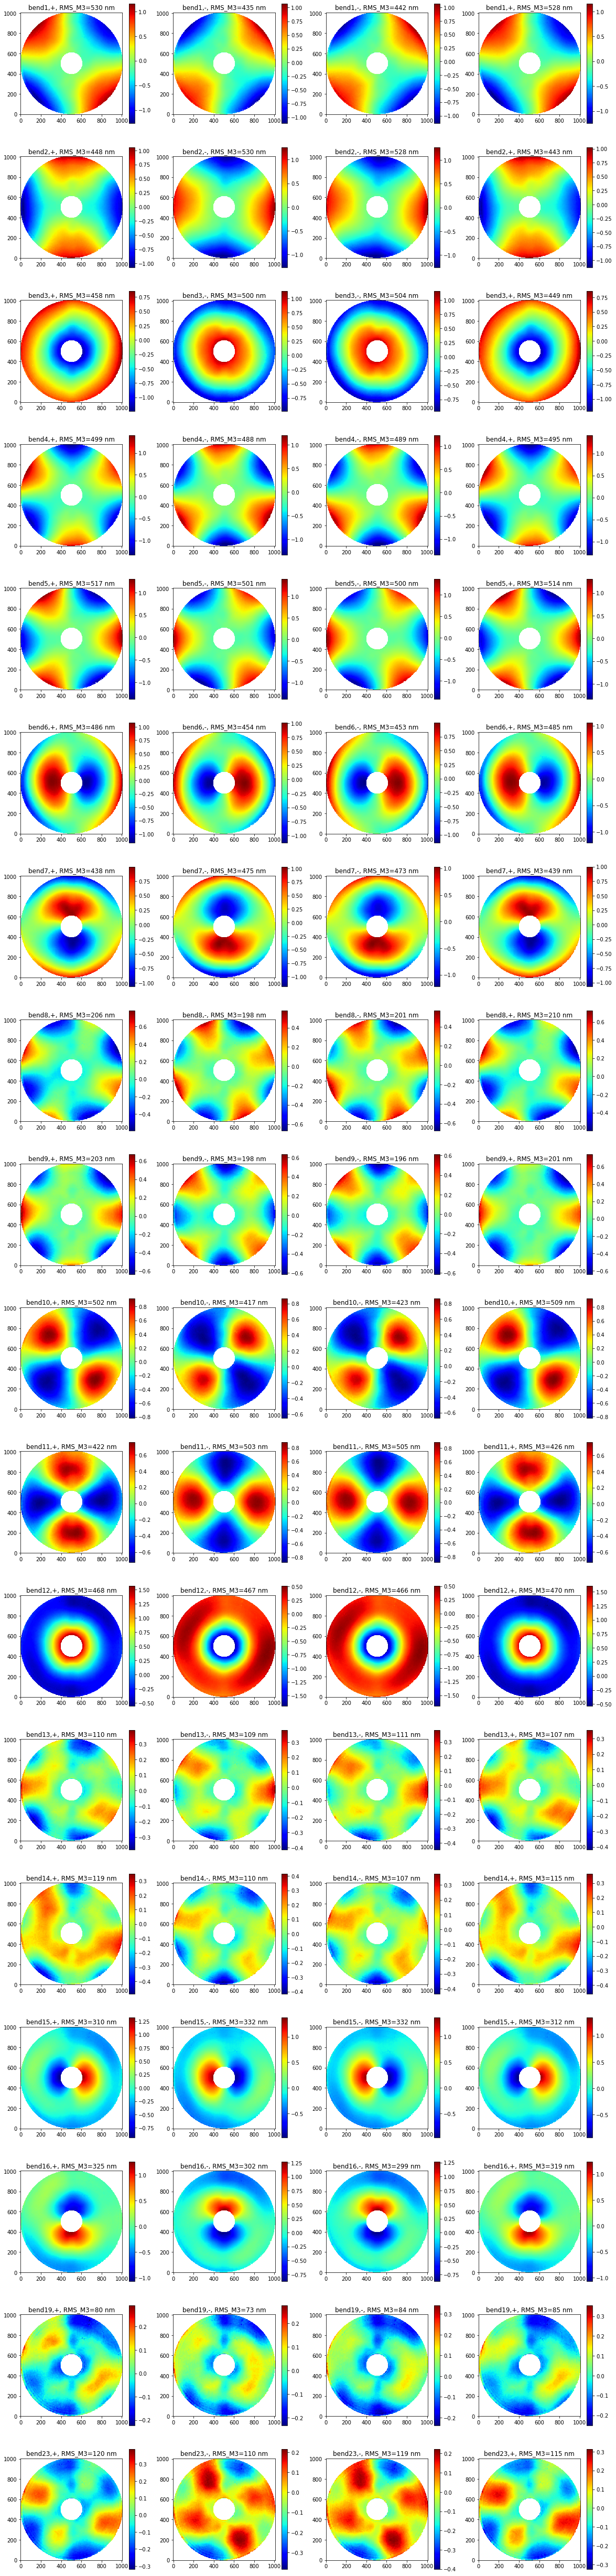

In [7]:
testID = '4-6'
testID1 = '3-7'
iter = ' (Labeled as 3-7)'
fig, ax = plt.subplots(18,4,figsize=(20,5*18))
i = 0
for modeID in np.hstack((np.arange(1,17), 19, 23)):
    signedBend = ['+%d-1'%modeID, '-%d-1'%modeID, '-%d-2'%modeID, '+%d-2'%modeID]
    for bend in signedBend:
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1
        print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
            testID, modeID, irow, icol))
        pattern = '%s/Processed/%d_%s%s/%d %s M3 bm%s*burst*morph -.h5'%(
            dataDir, dateID, testID, iter, dateID, testID1, bend)
        fileset = sorted(glob.glob(pattern))
        #print(pattern)
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)

        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm

        img = ax[irow][icol].imshow(m3s, origin='lowerleft')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('bend%d,%s, RMS_M3=%.0f nm'%(modeID, bend[0], m3rms))

### The measured bending modes
Mirror Lab scaled the forces and the shapes, so that the forces corresponding to these shapes are still 1N RMS forces

4-6 bending mode 1 ------ irow = 0, icol = 0, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/Combined/Combined M1M3 Map Mode number-1.h5: date not in h5 file. 
/Processed/190213_4-6 (Labeled as 3-7)/Combined/Combined M1M3 Map Mode number-1.h5: date not in h5 file. 
4-6 bending mode 2 ------ irow = 0, icol = 1, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/Combined/Combined M1M3 Map Mode number-2.h5: date not in h5 file. 
/Processed/190213_4-6 (Labeled as 3-7)/Combined/Combined M1M3 Map Mode number-2.h5: date not in h5 file. 
4-6 bending mode 3 ------ irow = 0, icol = 2, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/Combined/Combined M1M3 Map Mode number-3.h5: date not in h5 file. 
/Processed/190213_4-6 (Labeled as 3-7)/Combined/Combined M1M3 Map Mode number-3.h5: date not in h5 file. 
4-6 bending mode 4 ------ irow = 0, icol = 3, -----------------------------
/Processed/190213_4-6 (Labeled as 3-7)/Combined/Combined M1M

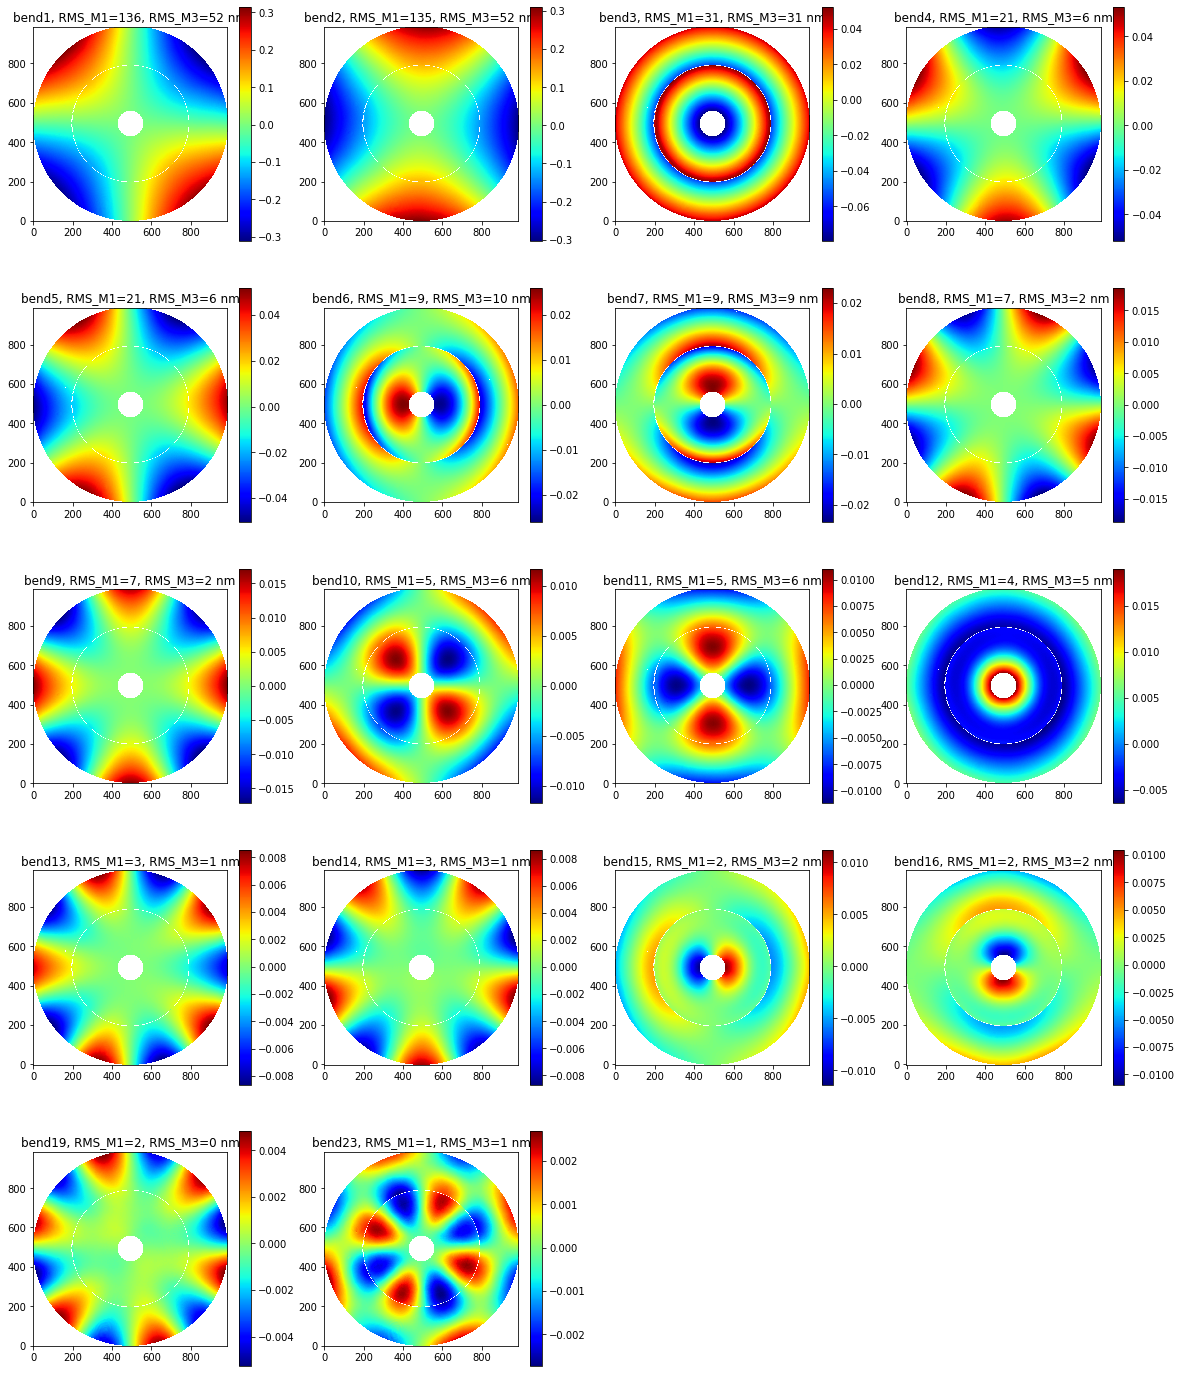

In [8]:
testID = '4-6'
testID1 = '3-7'
iter = ' (Labeled as 3-7)'
fig, ax = plt.subplots(5,4,figsize=(20,5*5))
i = 0
for modeID in np.hstack((np.arange(1,17), 19, 23)):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1
    print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
        testID, modeID, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/Combined/Combined*-%d.h5'%(
    dataDir, dateID, testID, iter, modeID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset, '/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset, '/M3Data')

    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm

    img = ax[irow][icol].imshow(s, origin='lowerleft')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(modeID, m1rms, m3rms))
fig.delaxes(ax.flatten()[-1])  
fig.delaxes(ax.flatten()[-2])  

### Scaling factors that need to be added to the FEA bending modes

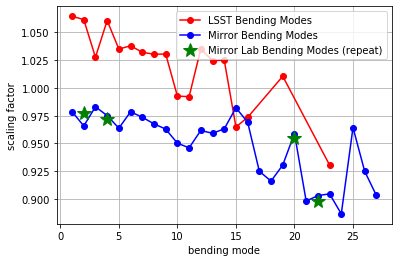

In [9]:
modeID = np.hstack((np.arange(1,17), 19, 23))
nmode = len(modeID)
scaleF = np.zeros(nmode)
icount = 0
for i in modeID:
    resultsFile = '%s/Combined/FitCoeff-Mode%d.csv'%(BMPatchDir, i)
    #print(resultsFile)
    df = pd.read_csv(resultsFile, header=None)
    scaleF[icount] = max(df[2])
    icount += 1
    
plt.plot(modeID, scaleF, '-ro',label='LSST Bending Modes')
plt.grid()
plt.xlabel('bending mode')
plt.ylabel('scaling factor')

#Mirror Lab bending modes
aa = np.loadtxt('data/ML_BM_scale.txt', skiprows=1)
modeID1 = aa[:,0]
scaleF1 = aa[:,1]
plt.plot(modeID1, scaleF1, '-bo', label='Mirror Bending Modes')
idx = ~np.isnan(aa[:,2])
plt.plot(modeID1[idx], aa[idx,2], 'g*', markersize = 15, label='Mirror Lab Bending Modes (repeat)')
plt.legend()

## Save scale factors to LSST_BM_scale.txt

In [10]:
aa = np.zeros((27, 2))
aa[:,0] = np.arange(27)+1
for i in range(len(modeID)):
    idx = np.where(aa[:,0]==modeID[i])[0][0]
    aa[idx,1] = scaleF[i]

np.savetxt('data/LSST_BM_scale.txt', aa, fmt='%d \t %.5f', header='modeID \t scaleF', comments='')

### Residual maps from fitting to FEA bending modes

In [12]:
# available in mat: 'Udn3norm','Vdn3norm','Gdn','x','y','dnx','dny','dnz'
import scipy.io
mat = scipy.io.loadmat('data/myUdn3norm_156.mat')
Udn3norm = mat['Udn3norm']
Vdn3norm = mat['Vdn3norm']
rmsF = np.std(Vdn3norm[:,:30], axis=0)

4-6 bending mode 1 ------ irow = 0, icol = 0, -----------------------------
/LSST_BM_patch_190508/Combined/Combined M1M3 Map Mode number-1-Residual.h5: date not in h5 file. 
/LSST_BM_patch_190508/Combined/Combined M1M3 Map Mode number-1-Residual.h5: date not in h5 file. 
4-6 bending mode 2 ------ irow = 0, icol = 1, -----------------------------
/LSST_BM_patch_190508/Combined/Combined M1M3 Map Mode number-2-Residual.h5: date not in h5 file. 
/LSST_BM_patch_190508/Combined/Combined M1M3 Map Mode number-2-Residual.h5: date not in h5 file. 
4-6 bending mode 3 ------ irow = 0, icol = 2, -----------------------------
/LSST_BM_patch_190508/Combined/Combined M1M3 Map Mode number-3-Residual.h5: date not in h5 file. 
/LSST_BM_patch_190508/Combined/Combined M1M3 Map Mode number-3-Residual.h5: date not in h5 file. 
4-6 bending mode 4 ------ irow = 0, icol = 3, -----------------------------
/LSST_BM_patch_190508/Combined/Combined M1M3 Map Mode number-4-Residual.h5: date not in h5 file. 
/LSST_BM_p

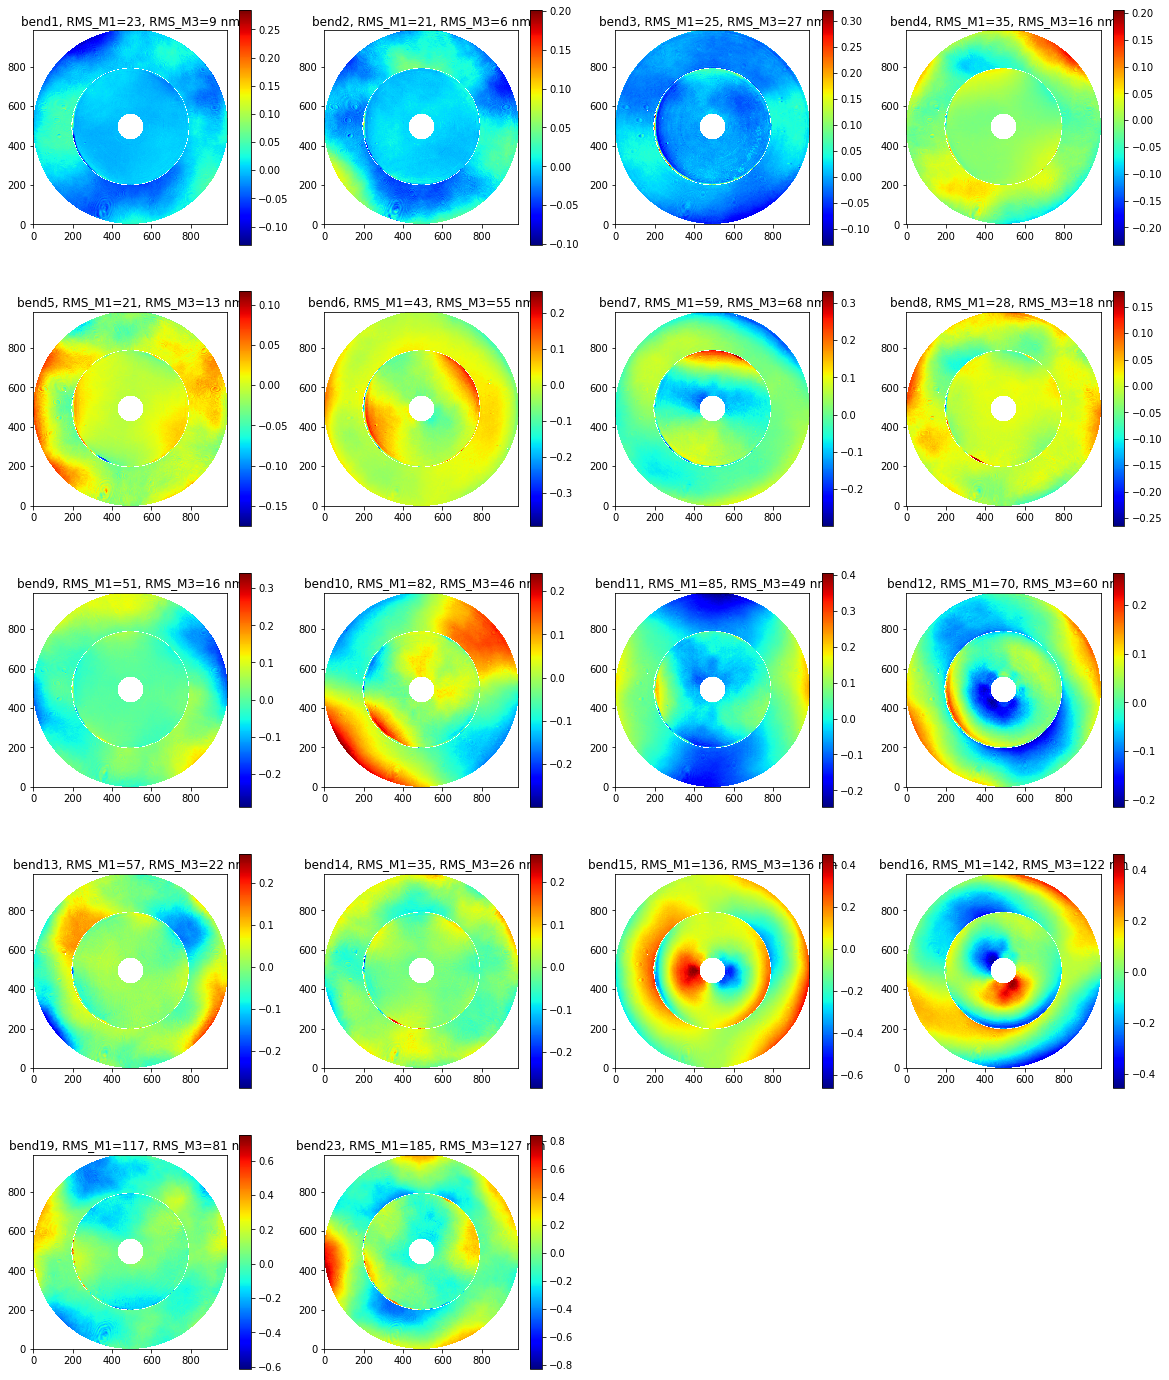

In [13]:
testID = '4-6'
testID1 = '3-7'
iter = ' (Labeled as 3-7)'
fig, ax = plt.subplots(5,4,figsize=(20,5*5))
i = 0
for modeID in np.hstack((np.arange(1,17), 19, 23)):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1
    print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
        testID, modeID, irow, icol))
    fileset = sorted(glob.glob('%s/Combined/Combined*-%d-Residual.h5'%(
        BMPatchDir, modeID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset, '/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset, '/M3Data')

    m1s = m1s*rmsF[modeID-1] #normalize to FEA forces
    m3s = m3s*rmsF[modeID-1]
    
    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm

    img = ax[irow][icol].imshow(s, origin='lowerleft')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(modeID, m1rms, m3rms))
fig.delaxes(ax.flatten()[-1])  
fig.delaxes(ax.flatten()[-2])  